In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


In [32]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style

In [3]:
Tcs_Data = pd.read_csv("TCS_stock_history.csv")

In [4]:
Tcs_Data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


In [5]:
Tcs_Data.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [6]:
lstsplit = Tcs_Data.loc[Tcs_Data['Stock Splits']!=0.0]

In [7]:
sp = lstsplit[-1:].index
sp

Int64Index([3642], dtype='int64')

In [45]:
WData = Tcs_Data.iloc[3642:,:6] #creating Working Data 

In [9]:
WData # we have excluded the Divident and split 

,Date,Open,High,Low,Close,Volume
3642,2018-05-31,1625.963422,1649.452732,1618.555607,1632.574219,5049371
3643,2018-06-01,1644.717387,1647.999320,1609.366324,1624.510010,1603856
3644,2018-06-04,1636.277978,1640.028759,1605.896634,1635.574707,1681483
3645,2018-06-05,1635.340455,1642.748270,1604.537190,1614.336060,2449568
3646,2018-06-06,1615.648755,1626.807351,1608.334687,1618.227417,2236512
...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161


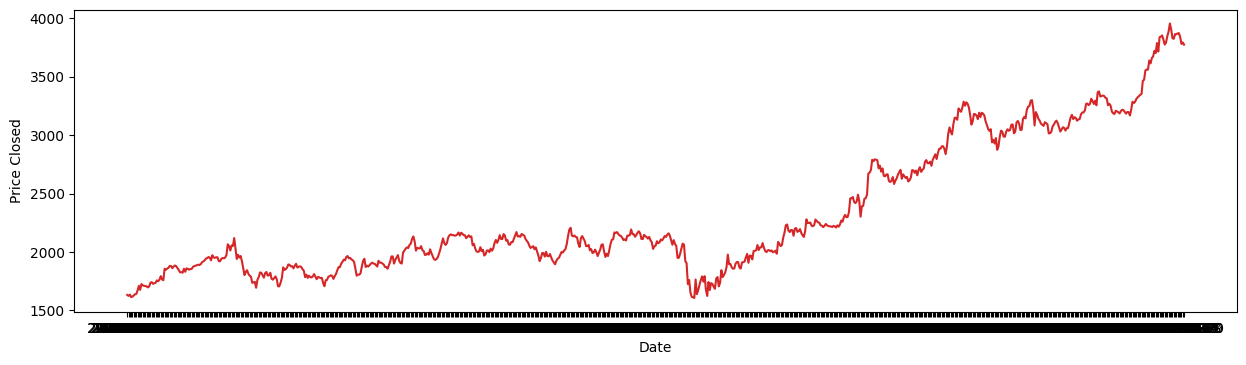

In [10]:
def plot_WDataata(WData, x, y, title="", xlabel='Date', ylabel='Price Closed', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_WData(WData,WData['Date'],WData['Close'])

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose


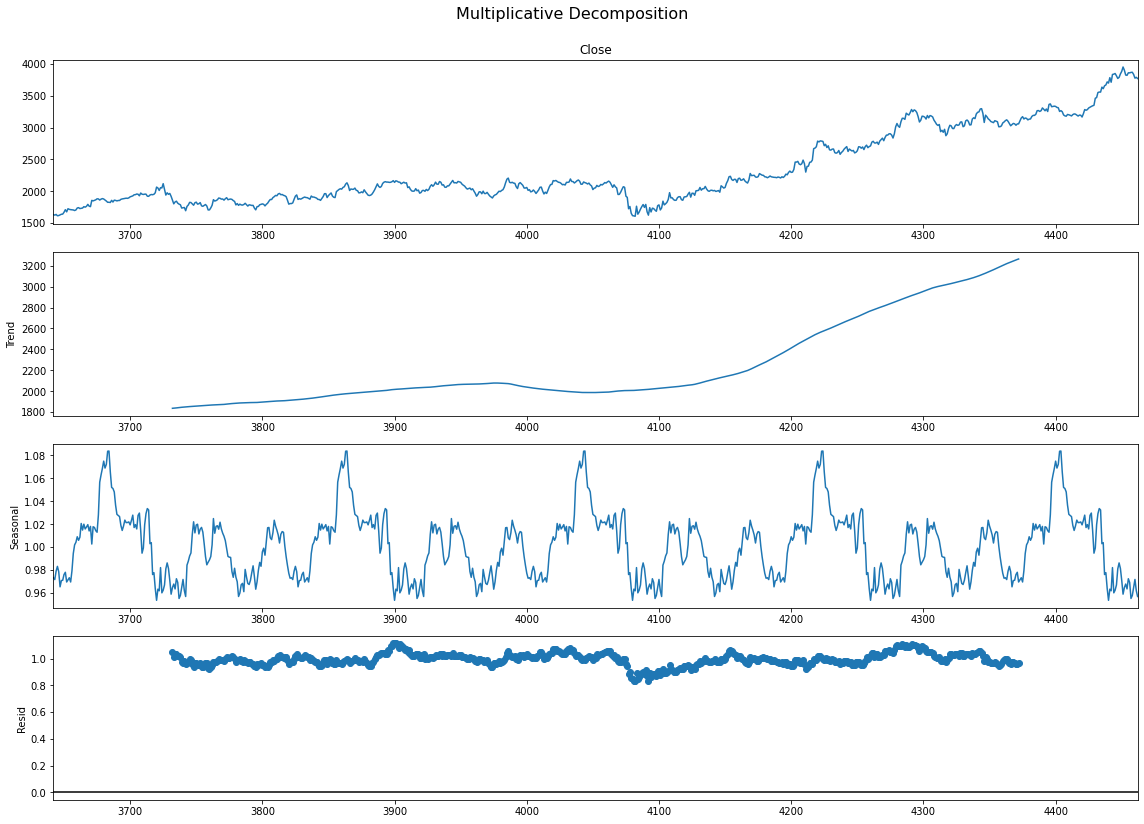

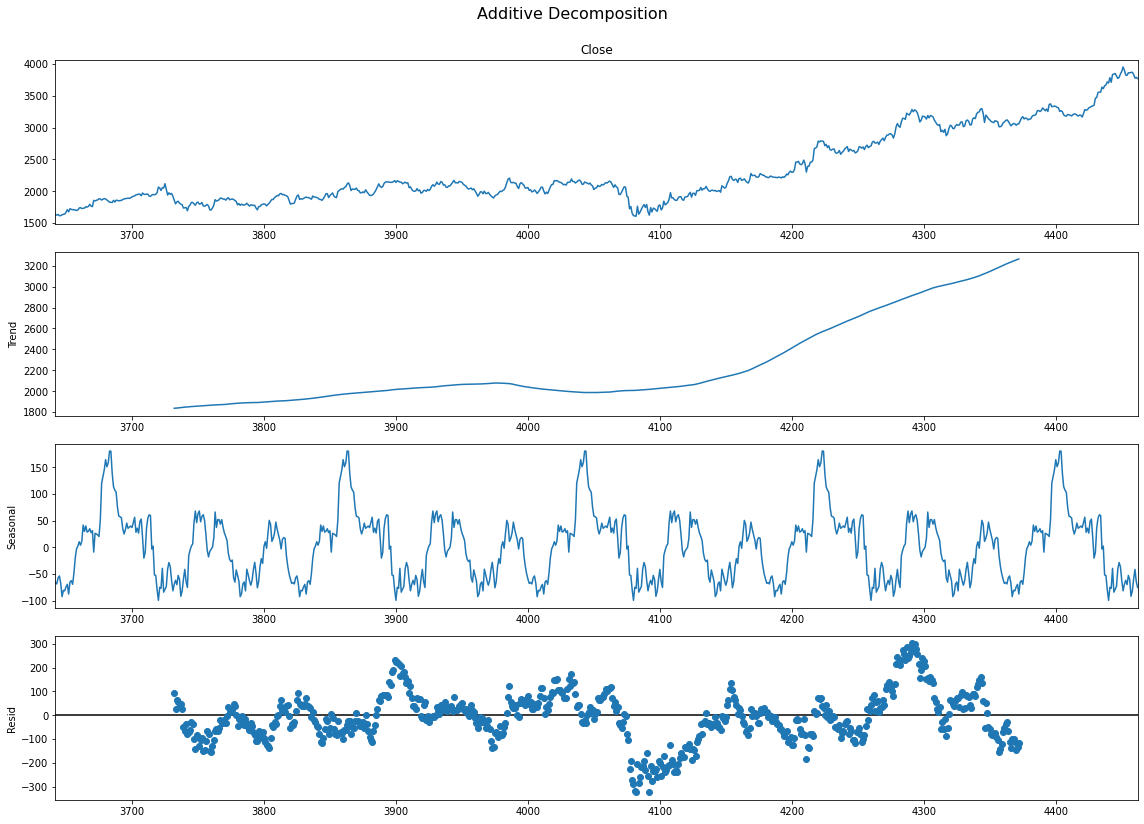

In [13]:
multiplicative_decomposition = seasonal_decompose(WData['Close'], model='multiplicative', period=180)

# Additive Decomposition
additive_decomposition = seasonal_decompose(WData['Close'], model='additive', period=180)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


In [46]:
WData["HL_Perc"] = (WData["High"]-WData["Low"]) / WData["Low"] * 100
WData["CO_Perc"] = (WData["Close"] - WData["Open"]) / WData["Open"] * 100

In [47]:
WData

,Date,Open,High,Low,Close,Volume,HL_Perc,CO_Perc
3642,2018-05-31,1625.963422,1649.452732,1618.555607,1632.574219,5049371,1.908932,0.406577
3643,2018-06-01,1644.717387,1647.999320,1609.366324,1624.510010,1603856,2.400510,-1.228623
3644,2018-06-04,1636.277978,1640.028759,1605.896634,1635.574707,1681483,2.125425,-0.042980
3645,2018-06-05,1635.340455,1642.748270,1604.537190,1614.336060,2449568,2.381439,-1.284405
3646,2018-06-06,1615.648755,1626.807351,1608.334687,1618.227417,2236512,1.148558,0.159605
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,2.319064,-0.480719
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,2.658500,-1.616668
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,2.632456,-1.840262
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,2.252733,0.853765


In [48]:
dates = np.array(WData["Date"]) # Taking Date as an Array for Further Manipulation
dates_check = dates[-90:]  # This Dates we gonna predict 
#print(dates_check)
dates = dates[:-90]
print(dates)

['2018-05-31' '2018-06-01' '2018-06-04' '2018-06-05' '2018-06-06'
 '2018-06-07' '2018-06-08' '2018-06-11' '2018-06-12' '2018-06-13'
 '2018-06-14' '2018-06-15' '2018-06-18' '2018-06-19' '2018-06-20'
 '2018-06-21' '2018-06-22' '2018-06-25' '2018-06-26' '2018-06-27'
 '2018-06-28' '2018-06-29' '2018-07-02' '2018-07-03' '2018-07-04'
 '2018-07-05' '2018-07-06' '2018-07-09' '2018-07-10' '2018-07-11'
 '2018-07-12' '2018-07-13' '2018-07-16' '2018-07-17' '2018-07-18'
 '2018-07-19' '2018-07-20' '2018-07-23' '2018-07-24' '2018-07-25'
 '2018-07-26' '2018-07-27' '2018-07-30' '2018-07-31' '2018-08-01'
 '2018-08-02' '2018-08-03' '2018-08-06' '2018-08-07' '2018-08-08'
 '2018-08-09' '2018-08-10' '2018-08-13' '2018-08-14' '2018-08-16'
 '2018-08-17' '2018-08-20' '2018-08-21' '2018-08-23' '2018-08-24'
 '2018-08-27' '2018-08-28' '2018-08-29' '2018-08-30' '2018-08-31'
 '2018-09-03' '2018-09-04' '2018-09-05' '2018-09-06' '2018-09-07'
 '2018-09-10' '2018-09-11' '2018-09-12' '2018-09-14' '2018-09-17'
 '2018-09-

In [49]:
WData = WData[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [50]:
WData

,HL_Perc,CO_Perc,Close,Volume
3642,1.908932,0.406577,1632.574219,5049371
3643,2.400510,-1.228623,1624.510010,1603856
3644,2.125425,-0.042980,1635.574707,1681483
3645,2.381439,-1.284405,1614.336060,2449568
3646,1.148558,0.159605,1618.227417,2236512
...,...,...,...,...
4458,2.319064,-0.480719,3871.300049,2320754
4459,2.658500,-1.616668,3836.949951,1673362
4460,2.632456,-1.840262,3779.149902,2253075
4461,2.252733,0.853765,3791.899902,2489161


In [51]:
#Shifting Closing Price for next 30 Days
WData["PriceNextMonth"] = WData["Close"].shift(-90)
print(WData['PriceNextMonth'].tail(90))
#The Last 30 Value will be Nan since we have shifted all the Price in section


4373   NaN
4374   NaN
4375   NaN
4376   NaN
4377   NaN
        ..
4458   NaN
4459   NaN
4460   NaN
4461   NaN
4462   NaN
Name: PriceNextMonth, Length: 90, dtype: float64


<ipython-input-51-4f8007ef7e6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WData["PriceNextMonth"] = WData["Close"].shift(-90)


In [52]:
WData

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
3642,1.908932,0.406577,1632.574219,5049371,1860.330444
3643,2.400510,-1.228623,1624.510010,1603856,1802.405029
3644,2.125425,-0.042980,1635.574707,1681483,1831.720093
3645,2.381439,-1.284405,1614.336060,2449568,1843.746826
3646,1.148558,0.159605,1618.227417,2236512,1812.834351
...,...,...,...,...,...
4458,2.319064,-0.480719,3871.300049,2320754,NaN
4459,2.658500,-1.616668,3836.949951,1673362,NaN
4460,2.632456,-1.840262,3779.149902,2253075,NaN
4461,2.252733,0.853765,3791.899902,2489161,NaN


In [53]:
print(WData.drop(["PriceNextMonth"], 1))

       HL_Perc   CO_Perc        Close   Volume
3642  1.908932  0.406577  1632.574219  5049371
3643  2.400510 -1.228623  1624.510010  1603856
3644  2.125425 -0.042980  1635.574707  1681483
3645  2.381439 -1.284405  1614.336060  2449568
3646  1.148558  0.159605  1618.227417  2236512
...        ...       ...          ...      ...
4458  2.319064 -0.480719  3871.300049  2320754
4459  2.658500 -1.616668  3836.949951  1673362
4460  2.632456 -1.840262  3779.149902  2253075
4461  2.252733  0.853765  3791.899902  2489161
4462  1.062417 -0.835744  3773.199951   640479

[821 rows x 4 columns]


<ipython-input-53-ae346153e88e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  print(WData.drop(["PriceNextMonth"], 1))


In [54]:
#Make fetaure and label arrays
#Expect PriceNextMonth all features that can effect our price is converted in array
X = np.array(WData.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
#now Currenlty we have 4 Column Data that is Scaled up i.e we have standardize our Data now we can manipulate this data 
X_Check = X[-90:]
#print(X_Check)
# Removing 90Days data from feature column Since we need to check for 90 Days
X = X[:-90]
print(X)

[[-0.30067392  0.29698288 -1.21044197  0.92306005]
 [ 0.0388522  -0.76328568 -1.22454708 -0.85811808]
 [-0.15114526  0.00548874 -1.20519381 -0.81798837]
 ...
 [-0.78863187 -0.11674316  1.24861742 -0.4832369 ]
 [-0.87083715  0.44641997  1.28422161 -0.81587764]
 [-0.87719884  0.03335705  1.28595875 -0.83309536]]


<ipython-input-54-01da9f4971b0>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(WData.drop(["PriceNextMonth"], 1))


In [55]:
WData.dropna(inplace = True) 

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [56]:
WData.tail(10)

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4363,1.254398,-0.014303,3123.372070,2137153,3827.850098
4364,1.195354,-0.076797,3100.633545,2415625,3823.500000
4365,1.608803,-1.038458,3065.879639,1978558,3862.949951
4366,1.924342,-1.516863,3030.033447,2043935,3862.149902
4367,1.291171,0.482815,3048.155273,2890462,3869.250000
4368,1.494477,-0.361289,3067.071289,2098538,3871.300049
4369,1.659545,-0.064851,3060.318848,1986041,3836.949951
4370,1.202449,-0.231492,3038.473633,2329027,3779.149902
4371,1.083429,0.637047,3058.829346,1685566,3791.899902
4372,1.074219,0.000000,3059.822510,1652260,3773.199951


In [57]:
#y is our Dependent variable that we need to predict so convert that to array
y = np.array(WData["PriceNextMonth"])
print(y.shape)


(731,)


In [58]:
X.shape #Checking the shape of or feautre and dependent Variable

(731, 4)

In [59]:
WData.shape

(731, 5)

In [60]:
# Splitting Our Data into Training and Testing 
# We will use 80 per of Data as Training data and rest 20 per as test Data in our sample
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [64]:
X_train.shape #Checking the Shape for our training Data set

(584, 4)

In [71]:
#Define the prediction model
model = RandomForestRegressor()

In [83]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9709766395121998


In [85]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [87]:
predictions = model.predict(X_Check)

In [102]:
WData['Close']

3642    1632.574219
3643    1624.510010
3644    1635.574707
3645    1614.336060
3646    1618.227417
           ...     
4368    3067.071289
4369    3060.318848
4370    3038.473633
4371    3058.829346
4372    3059.822510
Name: Close, Length: 731, dtype: float64

In [106]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
cls = np.array(WData['Close'])
actual["ClosePrice"] = cls
#print(actual["ClosePrice"])
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
print(actual)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame
print(result.tail(20))

             ClosePrice  Forecast
Date                             
2018-05-31  1632.574219       NaN
2018-06-01  1624.510010       NaN
2018-06-04  1635.574707       NaN
2018-06-05  1614.336060       NaN
2018-06-06  1618.227417       NaN
...                 ...       ...
2021-05-18  3067.071289       NaN
2021-05-19  3060.318848       NaN
2021-05-20  3038.473633       NaN
2021-05-21  3058.829346       NaN
2021-05-24  3059.822510       NaN

[731 rows x 2 columns]
            ClosePrice     Forecast
Date                               
2021-09-02         NaN  3350.068386
2021-09-03         NaN  3577.725417
2021-09-06         NaN  3572.812363
2021-09-07         NaN  3541.457209
2021-09-08         NaN  3258.805937
2021-09-09         NaN  3571.651592
2021-09-13         NaN  3451.958071
2021-09-14         NaN  3546.811665
2021-09-15         NaN  3435.214409
2021-09-16         NaN  3340.932234
2021-09-17         NaN  3478.759558
2021-09-20         NaN  3564.134851
2021-09-21         NaN  3574.5

Text(0, 0.5, 'Price')

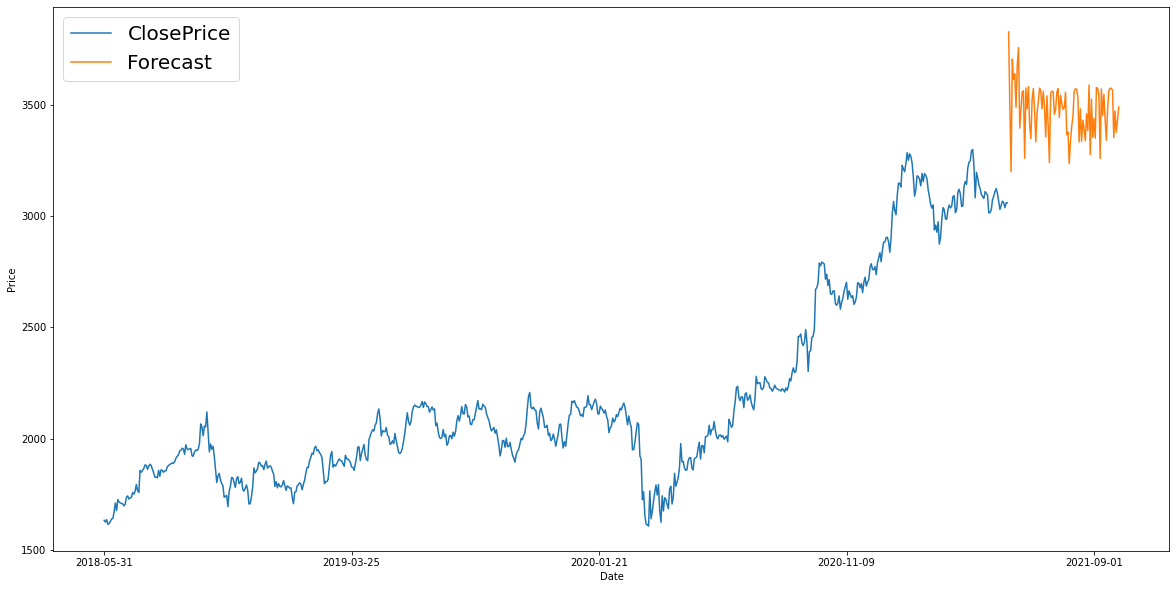

In [107]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')

In [99]:
result['ClosePrice'].iloc[500:570]

Date
2020-06-19   NaN
2020-06-22   NaN
2020-06-23   NaN
2020-06-24   NaN
2020-06-25   NaN
              ..
2020-09-18   NaN
2020-09-21   NaN
2020-09-22   NaN
2020-09-23   NaN
2020-09-24   NaN
Name: ClosePrice, Length: 70, dtype: float64

In [100]:
WData

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
3642,1.908932,0.406577,1632.574219,5049371,1860.330444
3643,2.400510,-1.228623,1624.510010,1603856,1802.405029
3644,2.125425,-0.042980,1635.574707,1681483,1831.720093
3645,2.381439,-1.284405,1614.336060,2449568,1843.746826
3646,1.148558,0.159605,1618.227417,2236512,1812.834351
...,...,...,...,...,...
4368,1.494477,-0.361289,3067.071289,2098538,3871.300049
4369,1.659545,-0.064851,3060.318848,1986041,3836.949951
4370,1.202449,-0.231492,3038.473633,2329027,3779.149902
4371,1.083429,0.637047,3058.829346,1685566,3791.899902
